# Lytics Data Science Take Home Exercise
## By Arvind Bandesha

# Import Data and Create Networkx Graph

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import community

In [2]:
with open('graph.json', encoding = 'utf8') as f:
    graph = json.load(f)
graph

{'nodes': [{'name': 'Bill Maher',
   'prevalence': 1,
   'x': -85.1569,
   'y': -137.9791},
  {'name': 'John Oliver', 'prevalence': 0.973, 'x': 268.7907, 'y': 57.8283},
  {'name': 'United States',
   'prevalence': 0.8595,
   'x': 36.1653,
   'y': -194.3289},
  {'name': 'Tyrion Lannister',
   'prevalence': 0.8595,
   'x': 179.9301,
   'y': -253.6939},
  {'name': 'Daenerys Targaryen',
   'prevalence': 0.773,
   'x': 178.8628,
   'y': -255.9866},
  {'name': 'Peter Dinklage',
   'prevalence': 0.7459,
   'x': 149.595,
   'y': -238.3178},
  {'name': 'Lena Headey', 'prevalence': 0.7405, 'x': 162.9279, 'y': -245.0054},
  {'name': 'Sarah Jessica Parker',
   'prevalence': 0.7027,
   'x': 11.9215,
   'y': -247.0711},
  {'name': 'Cersei Lannister',
   'prevalence': 0.6703,
   'x': 182.5901,
   'y': -257.2344},
  {'name': 'Arya Stark', 'prevalence': 0.627, 'x': 175.796, 'y': -259.1877},
  {'name': 'Chumel Torres',
   'prevalence': 0.6108,
   'x': -196.3775,
   'y': -164.1488},
  {'name': 'Emilia Cl

In [3]:
nodes = graph['nodes']
links = graph['links']
#nodes, links

In [4]:
nodes_data = pd.json_normalize(nodes)
links_data = pd.json_normalize(links)

In [5]:
nodes_data

,name,prevalence,x,y
0,Bill Maher,1.0000,-85.1569,-137.9791
1,John Oliver,0.9730,268.7907,57.8283
2,United States,0.8595,36.1653,-194.3289
3,Tyrion Lannister,0.8595,179.9301,-253.6939
4,Daenerys Targaryen,0.7730,178.8628,-255.9866
...,...,...,...,...
1055,Lawrence Gilliard Jr,0.0757,33.2643,-340.3711
1056,Samuel L Jackson,0.0865,-42.3066,-220.8983
1057,Cuba Gooding Jr,0.0595,59.8390,-259.5877
1058,John C Reilly,0.0757,-21.0133,-247.4566


In [6]:
links_data 

,source,target,value
0,13,0,0.6698
1,187,0,0.7381
2,285,0,1.0000
3,287,0,1.0000
4,36,1,1.0000
...,...,...,...
7158,1059,1019,1.0000
7159,1055,1024,1.0000
7160,1053,1033,0.2857
7161,1057,1040,0.5000


In [7]:
nodes_data.loc[36]

name          Paul Pennolino
prevalence            0.4919
x                   268.4033
y                    64.2371
Name: 36, dtype: object

In [8]:
print(len(nodes_data),len(links_data))

1060 7163


<p>Here, we have more links than nodes, which means we have to further assess the data as to whether or not is gives us enough info to keep the unidentified nodes, or to clean them out. This step takes methodical time, which I don't currently have given the time restrictions of the project. I will move on with the raw, unwrangled dataset.<p>

Total number of Edges =  7163
Total number of Nodes =  1003
Density =  0.014254641265823289


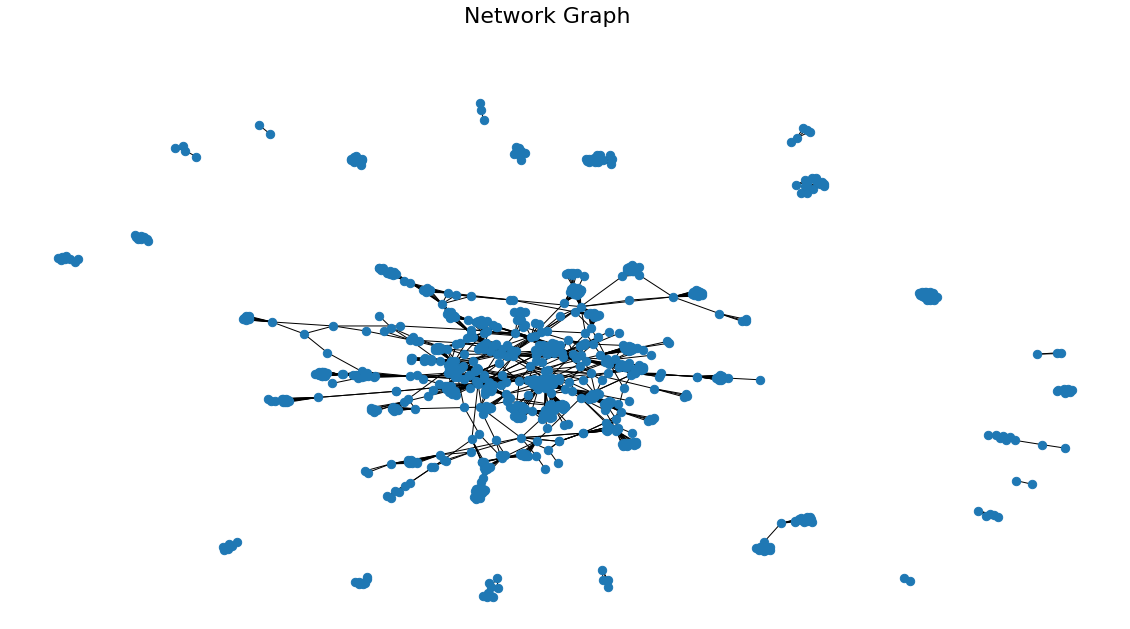

In [9]:
g = nx.from_pandas_edgelist(links_data,'source','target', edge_attr='value')
#for index, row in links_data.iterrows():
#    g.add_edge(row['source'], row['target'],weight=row['value'])
plt.figure(figsize=(20,10)) 
nx.draw_networkx(g, with_labels=False,node_size=70)
plt.box(on=None)
plt.axis('off')
plt.suptitle('Network Graph',fontsize=22)
# Additional metrics
print("Total number of Edges = ", len(g.edges()))
print("Total number of Nodes = ", len(g.nodes()))
print("Density = ", nx.classes.function.density(g))
plt.show()

In [10]:
print('k Components = ', nx.k_components(g))

KeyboardInterrupt: 

# Girvan Newman Algorithm (Manually Removing Edges)

In [11]:
def manual_girvan_newman(graph):
# finding number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [12]:
# finding communities in the graph
comms = manual_girvan_newman(g.copy())
node_groups = []
# finding the nodes forming the communities
for i in comms:
  node_groups.append(list(i))

In [13]:
# Creating a dictionary for the community number associated with each node
#cgar = manual_girvan_newman(g.copy())
com=0
thisdict={}

# Populating the items of the dictionary
for c in node_groups:
    list=sorted(c)
    for i in range(len(list)):
        if list[i] in thisdict:
            print('already found')
        else:
            thisdict.update({list[i]: com})
        i+=1
    com+=1

girvan_values=[thisdict.get(node) for node in g.nodes()]
girvan_values

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Total number of Communities= 23


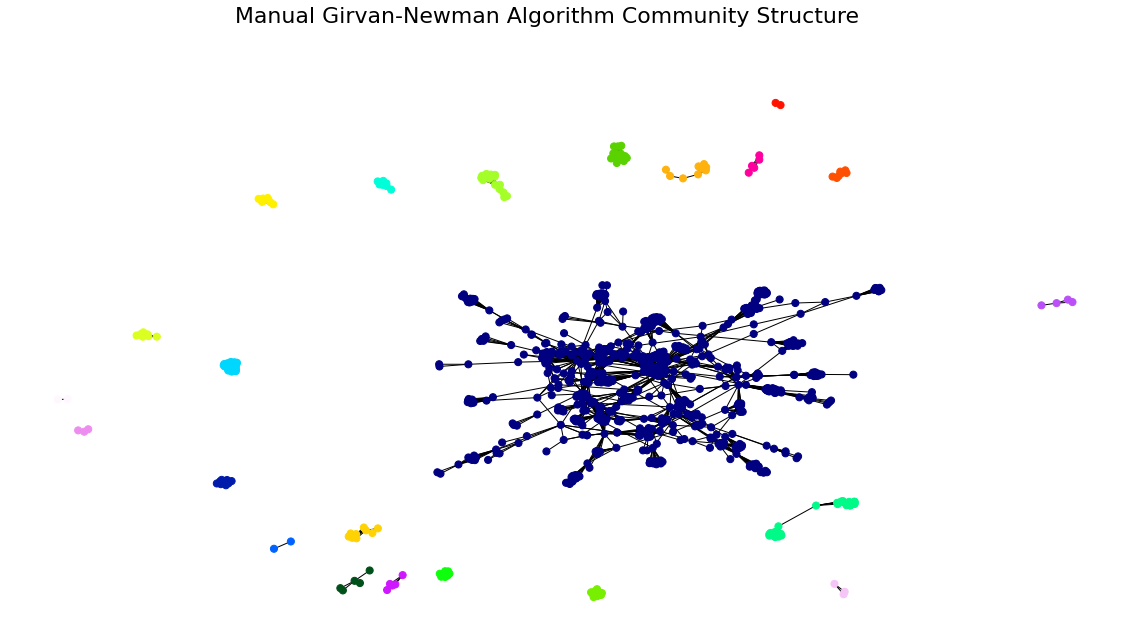

In [14]:
plt.figure(figsize=(20,10))
pos = nx.drawing.spring_layout(g)
nx.draw_networkx(g, pos, cmap=plt.get_cmap('gist_ncar'), node_color=girvan_values,node_size=50, with_labels=False)
plt.suptitle('Manual Girvan-Newman Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
#plt.savefig('louvain_2.png',dpi=400, bbox_inches='tight')
print("Total number of Communities=", len(node_groups))
plt.show()

# Girvan-Newman (NetworkX Removes Edges)

In [15]:
# Creating a dictionary for the community number associated with each node
from networkx.algorithms.community.centrality import girvan_newman
comp=girvan_newman(g)
com=0
thisdict={}

# Populating the items of the dictionary
for c in next(comp):
    list=sorted(c)
    for i in range(len(list)):
        if list[i] in thisdict:
            print('already found')
        else:
            thisdict.update({list[i]: com})
        i+=1
    com+=1

values_girvan=[thisdict.get(node) for node in g.nodes()]
values_girvan

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Total number of Communities= 24
Modularity: 0.23782634631653826


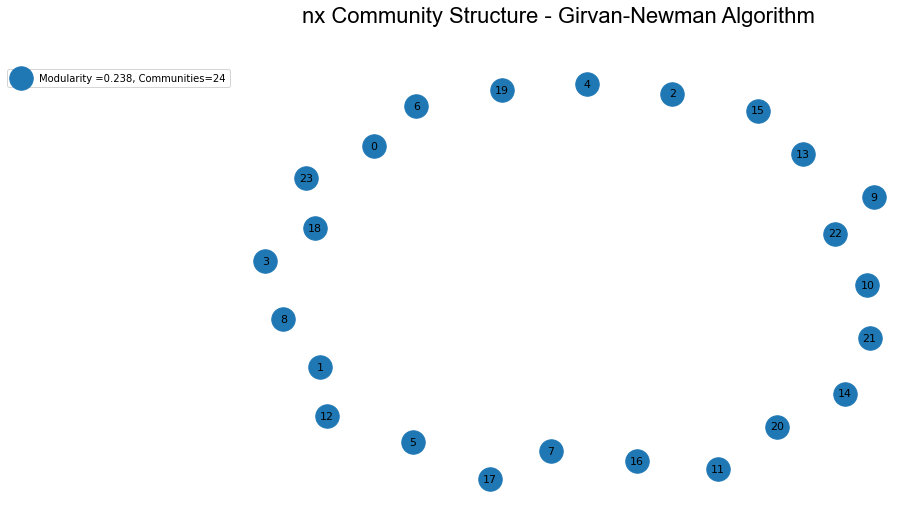

In [16]:
#Creating a dictionary like 'Community num':'List of participants'
dict_nodes_girvan = {}
for each_item in thisdict.items():
    community_num=each_item[1]
    community_node=each_item[0]
    
    if community_num in dict_nodes_girvan:
        value = str(dict_nodes_girvan.get(community_num)) + ' , ' + str(community_node)
        dict_nodes_girvan.update({community_num: value})
    else:
        dict_nodes_girvan.update({community_num: community_node})
        
#dataframe for community identification
community_df_girvan=pd.DataFrame.from_dict(dict_nodes_girvan, orient='index',columns=['Members'])
community_df_girvan.index.rename('Community Num', inplace=True)
#community_df_girvan.to_csv('Community_List_girvan_snippet.csv')

# Creating a graph where each node represents a community
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm_girvan=nx.Graph()
G_comm_girvan.add_nodes_from(dict_nodes_girvan)

#Communities and Modularity
print("Total number of Communities=", len(G_comm_girvan.nodes()))
mod_girv=community.modularity(thisdict,g)
print("Modularity:", mod_girv)

#Creating Graph
pos_girvan=nx.spring_layout(G_comm_girvan)
nx.draw_networkx(G_comm_girvan, pos_girvan,with_labels=True,node_size=550,font_size=11, 
                 label='Modularity =' + str(round(mod_girv,3)) +', Communities=' + str(len(G_comm_girvan.nodes())))
plt.suptitle('nx Community Structure - Girvan-Newman Algorithm',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
#plt.savefig('Girvan-Newman.png', dpi=400, bbox_inches='tight')
plt.show()

Total number of Communities= 24


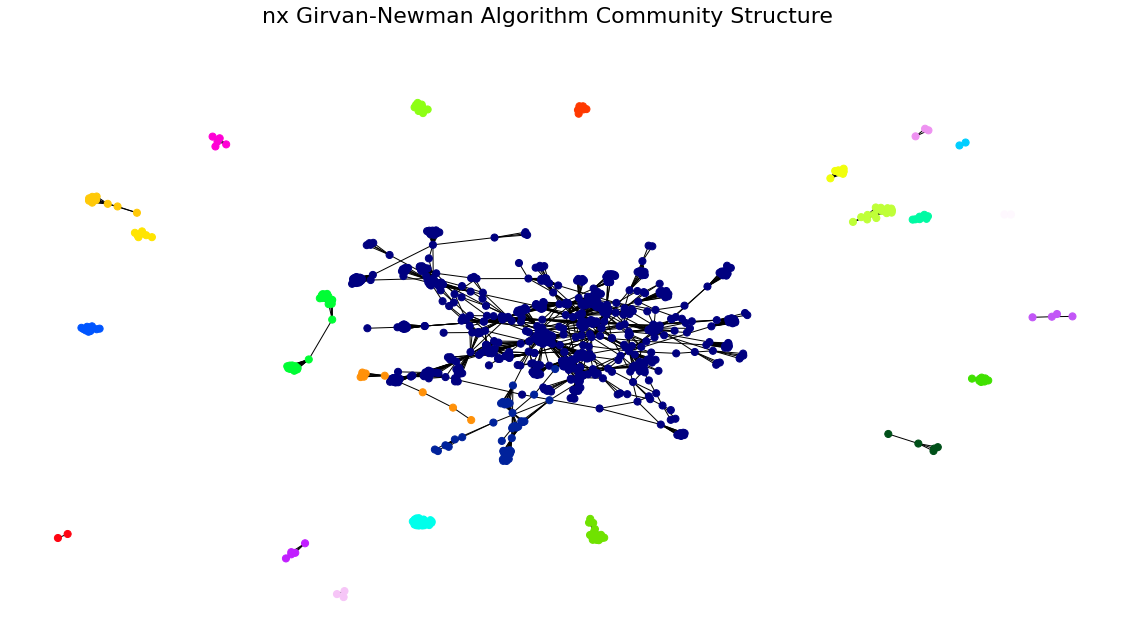

In [17]:
plt.figure(figsize=(20,10))
pos = nx.drawing.spring_layout(g)
nx.draw_networkx(g, pos, cmap=plt.get_cmap('gist_ncar'), node_color=values_girvan,node_size=50, with_labels=False)
plt.suptitle('nx Girvan-Newman Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
#plt.savefig('louvain_2.png',dpi=400, bbox_inches='tight')
print("Total number of Communities=", len(G_comm_girvan.nodes()))
plt.show()

In [18]:
community_df_girvan

,Members
Community Num,
0,"0 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 11 , 12 , ..."
1,"1 , 36 , 256 , 302 , 406"
2,"33 , 69 , 73 , 102 , 209 , 210 , 212 , 224 , 2..."
3,"138 , 144 , 145 , 146 , 148 , 384 , 400 , 421 ..."
4,"165 , 308"
5,"167 , 288 , 296 , 420 , 431 , 435 , 488 , 504 ..."
6,"186 , 191 , 193 , 247 , 450 , 501 , 658 , 785"
7,"204 , 334 , 360 , 388 , 393 , 394 , 395 , 397 ..."
8,"245 , 274 , 284 , 303 , 304 , 314 , 333 , 373 ..."


# Louvain Algorithm

Modularity:  0.8245216310749183
Total number of Communities= 45


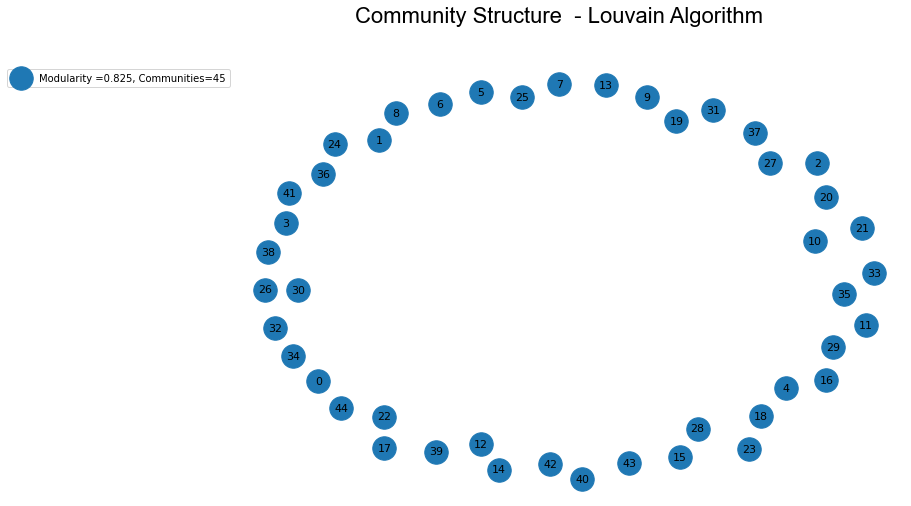

In [19]:
#coms = algorithms.louvain(g, weight = 'weight', resolution=1., randomize=False)
#leiden_communities = algorithms.leiden(g)
partition = community.best_partition(g)

values=[partition.get(node) for node in g.nodes()]
list_com=partition.values()
# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value = str(dict_nodes.get(community_num)) + ' , ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
#community_df.to_csv('Community_List_snippet.csv')

# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

#Modularity and Communities
mod=community.modularity(partition,g)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Graph
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.drawing.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=550,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community Structure  - Louvain Algorithm',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
#plt.savefig('louvain.png',dpi=400, bbox_inches='tight')
plt.show()

Total number of Communities= 45


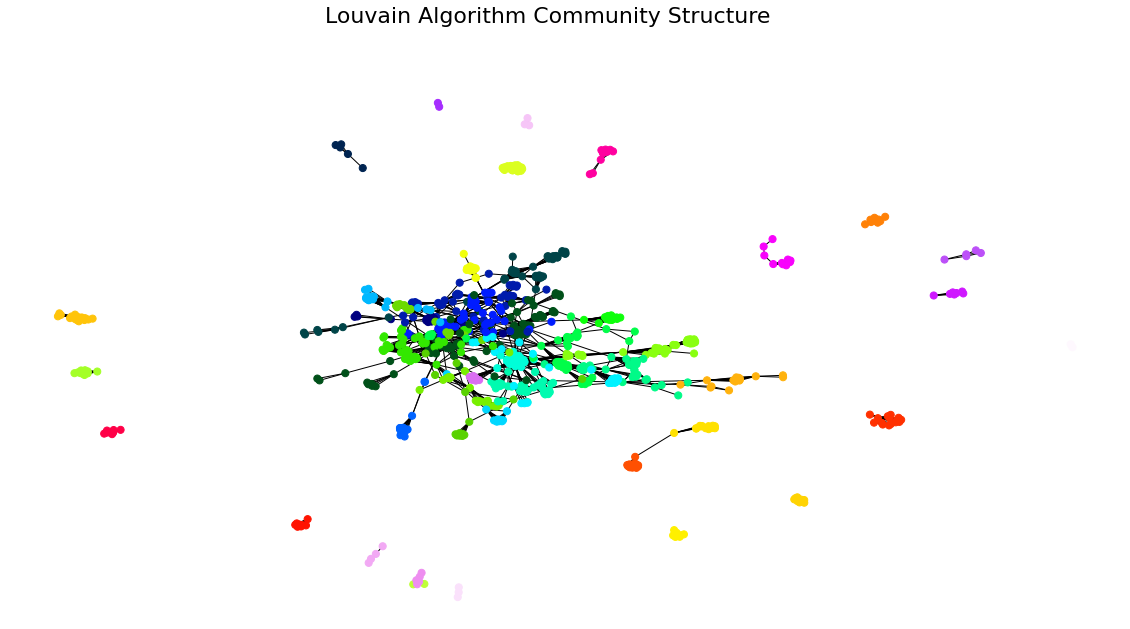

In [20]:
plt.figure(figsize=(20,10))
pos = nx.drawing.spring_layout(g)
nx.draw_networkx(g, pos, cmap=plt.get_cmap('gist_ncar'), node_color=values,node_size=50, with_labels=False)
plt.suptitle('Louvain Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
#plt.savefig('louvain_2.png',dpi=400, bbox_inches='tight')
print("Total number of Communities=", len(G_comm.nodes()))
plt.show()

In [21]:
community_df

,Members
Community_Num,
0,"13 , 0 , 187 , 285 , 287 , 372 , 419 , 477 , 4..."
1,"36 , 1 , 256 , 302 , 406"
2,"137 , 2 , 176 , 208 , 233 , 249 , 250 , 257 , ..."
3,"329 , 69 , 33 , 73 , 248 , 863 , 866 , 867 , 2..."
4,"656 , 707 , 51 , 12 , 103 , 158 , 162 , 169 , ..."
5,"665 , 703 , 741 , 690 , 14 , 131 , 269 , 294 ,..."
6,"725 , 847 , 310 , 281 , 324 , 325 , 336 , 408 ..."
7,"752 , 86 , 68 , 89 , 95 , 117 , 123 , 143 , 18..."
8,"758 , 479 , 377 , 629 , 635 , 637 , 708 , 715 ..."


<h1>Summary</h1>
<p>The initial step in this project was to understand the data and what the given task at hand is. I started to import the data and view it along with some summary statistics so I could see what I am working with.<p>

<p>Once that part was done, I started tackling the given task which is primarily to identify the optimal number of communities, or neighborhoods in the network. I started this by viewing the network with the help of the newtworkx package that creates an object of the graph that can be used for many analysis' including community detection.<p>

<p>My first step was to perform a Gervan-Newman algorithm on the network to see how many optimal number of neighborhoods it asseses. I did this both with a custom function that uses networkx components and manually removes edges, as well as with the built in gervan_newman() function to perform this. Alongside that, I also performed a Louvain algorithm for community detection. The results are as follows:<p>
 
<h2>Algorithm Results</h2>

- The 'manual' Gervan-Newman algorithm gave us 23 communities.

- The built-in Gervan-Newman algorithm gave us 24 communities.

- The Louvain algorithm gave us 44 communites

<h2>Next Steps</h2>
<p>My next steps, given more time, would be to use the outputted dataframes from the community detection functions to identify the different neighborhoods in the network (i.e John Oliver Show, a cerain movie, etc...) based on the corresponding index of the links and nodes (with the use of lookup functions). This would help me understand the algorithms' results better, and perhaps make more sense of the stark difference between the results of the two different algorithms as well as betwen my manual Gervan-Newsom and the networkx one. I would also have to assess overlapping edges and run algorithms to assess the different cliques in the neighborhoods. Another process I would want to implement would be to try and assess centrality as well as other components of the nodes which can also be done in the networkx package as well as in cdlib.<p>

<p>All in all, I am satisfied with results of the algorithms and the work done given the time I had, and would actually love to expand on my ideas going forward perhaps in my free time.<p>

# Scrap Work

## iGraph (library imports made this unsuccessful)

In [6]:
import igraph


OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

In [8]:
!pip install libcairo-2

ERROR: Could not find a version that satisfies the requirement libcairo-2
ERROR: No matching distribution found for libcairo-2


In [37]:
tuples = [tuple(x) for x in links_data.values]
g = igraph.Graph.TupleList(tuples, directed = True, edge_attrs = ['value'])

In [38]:
igraph.plot(g)

AttributeError: plotting not available

## Scrap Work Cells

In [34]:
#louvain
coms = algorithms.louvain(g, weight = 'weight', resolution=1., randomize=False)
leiden_communities = algorithms.leiden(g)
mod = coms.omega(leiden_communities)
coms.size()
mod

MatchingResult(score=0.8995259924068157, std=None)

In [38]:
weight = []
for node in g:
    weight.append(links_data['value'].loc[node])

In [42]:
partition = community.best_partition(g)
for i in partition.items():
    print(i)

(13, 0)
(0, 0)
(187, 0)
(285, 0)
(287, 0)
(36, 1)
(1, 1)
(256, 1)
(302, 1)
(406, 1)
(137, 2)
(2, 2)
(176, 2)
(208, 2)
(233, 2)
(249, 2)
(250, 2)
(257, 2)
(268, 2)
(318, 2)
(329, 3)
(402, 2)
(417, 2)
(460, 2)
(555, 2)
(572, 2)
(616, 2)
(656, 4)
(665, 5)
(680, 2)
(703, 5)
(707, 4)
(725, 6)
(732, 2)
(741, 5)
(752, 7)
(758, 2)
(759, 2)
(847, 6)
(851, 2)
(860, 2)
(892, 2)
(940, 2)
(960, 2)
(1034, 2)
(1052, 8)
(4, 9)
(3, 9)
(5, 9)
(6, 9)
(8, 9)
(9, 9)
(11, 9)
(26, 9)
(29, 9)
(30, 9)
(31, 9)
(34, 9)
(35, 9)
(47, 9)
(52, 9)
(63, 9)
(65, 9)
(76, 9)
(77, 9)
(78, 9)
(80, 9)
(82, 9)
(104, 9)
(105, 9)
(112, 9)
(119, 9)
(120, 9)
(124, 9)
(125, 9)
(142, 9)
(153, 9)
(161, 9)
(163, 9)
(168, 9)
(170, 9)
(181, 9)
(199, 9)
(206, 9)
(207, 9)
(239, 9)
(251, 9)
(254, 9)
(289, 9)
(290, 9)
(320, 9)
(338, 9)
(346, 10)
(352, 9)
(353, 9)
(369, 9)
(381, 9)
(399, 9)
(443, 9)
(467, 9)
(485, 9)
(503, 9)
(512, 9)
(523, 9)
(533, 9)
(553, 9)
(565, 9)
(571, 9)
(574, 9)
(582, 9)
(584, 9)
(606, 9)
(611, 9)
(615, 9)
(638, 9

In [40]:
len(coms.to_node_community_map())

1003

In [40]:
links_data['value'].loc[node]

0.55